In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="011e7212be70f010a0707e2562a7606d562f3fd9a39b5b0af3797d36847c28543e64073c789f41df789f1a79444c2e320f674b165d0244fc43ae941af6de6754", set_as_default=True, overwrite=True)
 
# Load saved credentials
service = QiskitRuntimeService()

In [5]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_sherbrooke')>]

In [10]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, circuit_drawer
import numpy as np


# 利用可能なバックエンドの取得
backends = service.backends()
print("Available backends:", backends)

Available backends: [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibm_sherbrooke')>]
Least busy backend:  <IBMBackend('ibm_kyoto')>


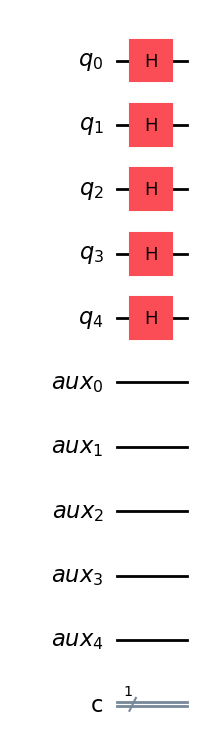

In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

qreg_q = QuantumRegister(5, 'q')
qreg_a = QuantumRegister(5, 'aux')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, qreg_a,creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])

circuit.draw('mpl')

define U_f

In [23]:
def c_amod7(a, l):
    """mod 7による制御ゲート"""

    if a not in [3, 5, 7, 8, 11, 13, 15, 17, 19, 21, 23, 25, ]:
        raise ValueError("'a' must be 2, 4, 7, 8, 11, or 13")

    U = QuantumCircuit(4)

    ##################
    ### EDIT BELOW ###
    ##################

    #if a == 2:
    #    ...
    #elif a == 4:
    #    ...
    #    ...

    ##################
    ### EDIT ABOVE ###
    ##################

    # Uを2^l回繰り返す
    U_power = U.repeat(2 ** l)

    # U_powerをゲートに変換
    gate = U_power.to_gate()
    gate.name = f"{a}^{2 ** l} mod 15"

    # gateを制御ゲートに変換
    c_gate = gate.control()
    return c_gate
    
def qft_dagger(qreg):
    """逆量子フーリエ変換用の回路"""
    qc = QuantumCircuit(qreg)

    ##################
    ### EDIT BELOW ###
    ##################

    for j in range(qreg.size // 2):
        qc.swap(qreg[j], qreg[-1 - j])

    for itarg in range(qreg.size):
        for ictrl in range(itarg):
            power = ictrl - itarg - 1
            qc.cp(-2. * np.pi * (2 ** power), ictrl, itarg)

        qc.h(itarg)

    ##################
    ### EDIT ABOVE ###
    ##################

    qc.name = "QFT^dagger"
    return qc

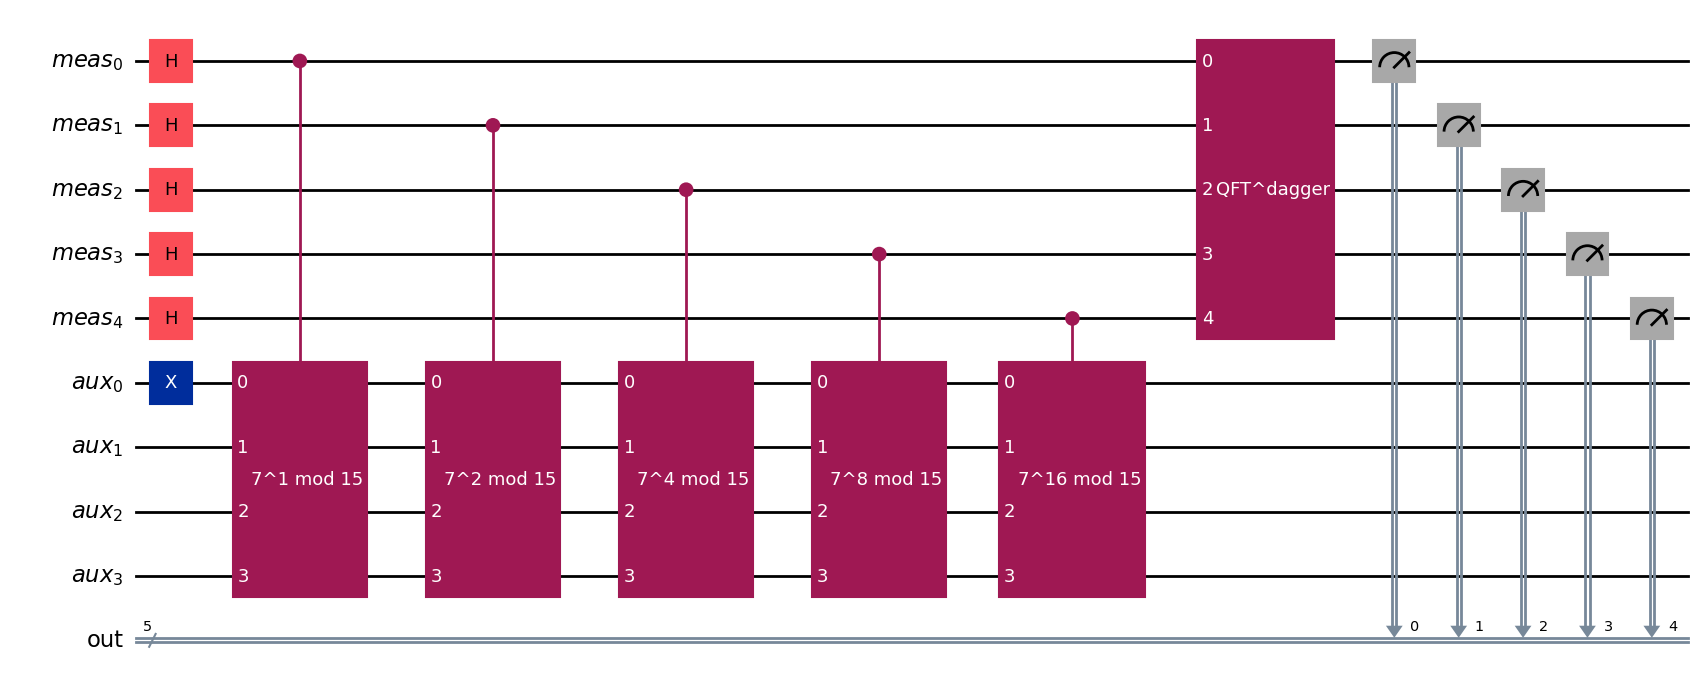

In [27]:
# 15と互いに素な数
a = 7

# 測定用ビットの数（位相推定の精度）
n_meas = 5

# 位相測定用のレジスタ
qreg_meas = QuantumRegister(n_meas, name='meas')
# Uを作用させる作業用レジスタ
qreg_aux = QuantumRegister(4, name='aux')
# 位相測定の結果が書き出される古典レジスタ
creg_meas = ClassicalRegister(n_meas, name='out')

# 2つの量子レジスタと1つの古典レジスタから量子回路を作る
qc = QuantumCircuit(qreg_meas, qreg_aux, creg_meas)

# 測定用レジスタをequal superpositionに初期化
qc.h(qreg_meas)
# 作業用レジスタを|1>に初期化
qc.x(qreg_aux[0])

# 制御Uゲートを適用
for l, ctrl in enumerate(qreg_meas):
    qc.append(c_amod15(a, l), qargs=([ctrl] + qreg_aux[:]))

# 逆QFTを適用
qc.append(qft_dagger(qreg_meas), qargs=qreg_meas)

# 回路を測定
qc.measure(qreg_meas, creg_meas)
qc.draw('mpl')

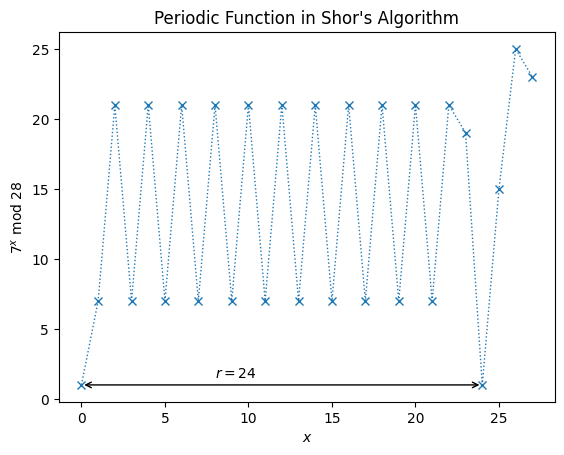

In [28]:
N = 28
a = 7

# プロットするデータを計算する
xvals = np.arange(28)
yvals = [np.mod(a**x, N) for x in xvals]

# matplotlibを使って描画
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel=f'${a}^x$ mod {N}',
       title="Periodic Function in Shor's Algorithm")

try: # グラフ上にrをプロット
    r = yvals[1:].index(1) + 1
except ValueError:
    print('Could not find period, check a < N and have no common factors.')
else:
    plt.annotate(text='', xy=(0, 1), xytext=(r, 1), arrowprops={'arrowstyle': '<->'})
    plt.annotate(text=f'$r={r}$', xy=(r / 3, 1.5))